In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Load the file to the data_set
file = "D:\\BeCode\\Projects\\immoeliza-pipeline\\scraper\\data\\maintest.csv"
df= pd.read_csv(file)

In [2]:
if (df.isnull().sum().sum()) != 0:

    #Replace empty strings if any.
    df.replace('', np.nan, inplace=True) 

    #Make NaN as the placeholder for every null value representation
    df.fillna(value=np.nan, inplace=True)

    #write final output to csv
    df.to_csv("D:\\BeCode\\Projects\\immoeliza-pipeline\\scraper\\data\\raw_properties.csv")

In [3]:

numeric_columns_df =  df[["property_id","living_area","price","number_of_rooms","postal_code",
                          "terrace_surface","garden","land_area", "facades","open_fire","swimming_pool","furnished"]]


all_columns_dtypes = df.dtypes 
# check the selected columns are numeric same as the one specified
numeric_columns = df.select_dtypes(include=np.number).columns
is_all_numeric = len(numeric_columns) == len(numeric_columns_df.columns)
if(not is_all_numeric):
    convert_dict = { }
    for column in numeric_columns_df: 
        # Select column contents by column
        columnSeriesObj = numeric_columns_df[column]
        if is_numeric_dtype(columnSeriesObj.dtype):
            convert_dict[column] = columnSeriesObj.dtype 
        else:
            convert_dict[column] = np.float64     
    df = df.astype(convert_dict)
    df.to_csv("D:\\BeCode\\Projects\\immoeliza-pipeline\\scraper\\data\\raw_properties.csv")


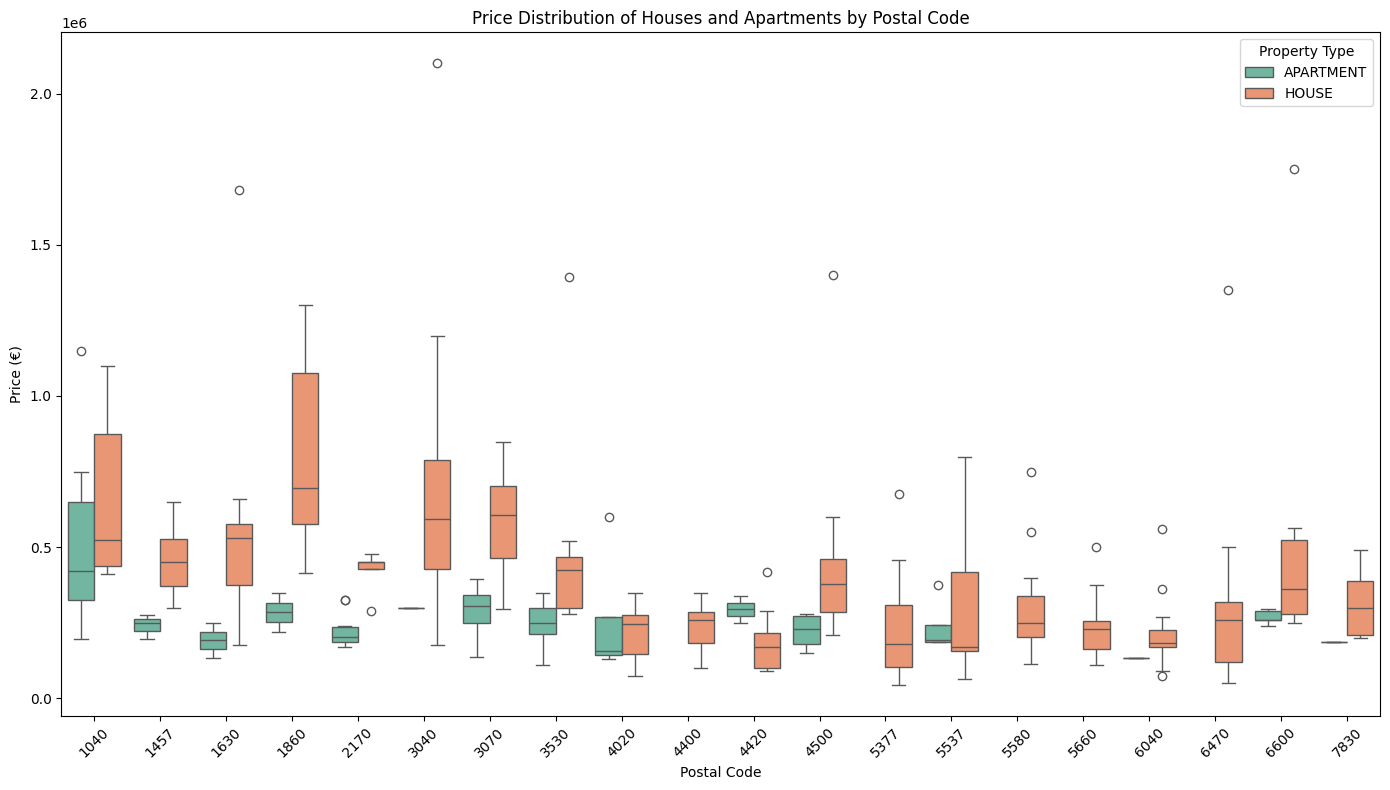

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'D:\\BeCode\\Projects\\immoeliza-pipeline\\scraper\\data\\raw_properties.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Data Cleaning
data['price'] = pd.to_numeric(data['price'], errors='coerce')  # Convert price to numeric
data = data.dropna(subset=['price', 'postal_code', 'type_of_property'])  # Drop rows with missing values

# Filter for houses and apartments
filtered_data = data[data['type_of_property'].isin(['HOUSE', 'APARTMENT'])]

# Limit to the top 20 postal codes with the most listings
top_postal_codes = filtered_data['postal_code'].value_counts().head(20).index
filtered_data = filtered_data[filtered_data['postal_code'].isin(top_postal_codes)]

# Plot the distribution using a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=filtered_data,
    x='postal_code', 
    y='price', 
    hue='type_of_property', 
    palette='Set2'
)
plt.title('Price Distribution of Houses and Apartments by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Price (€)')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

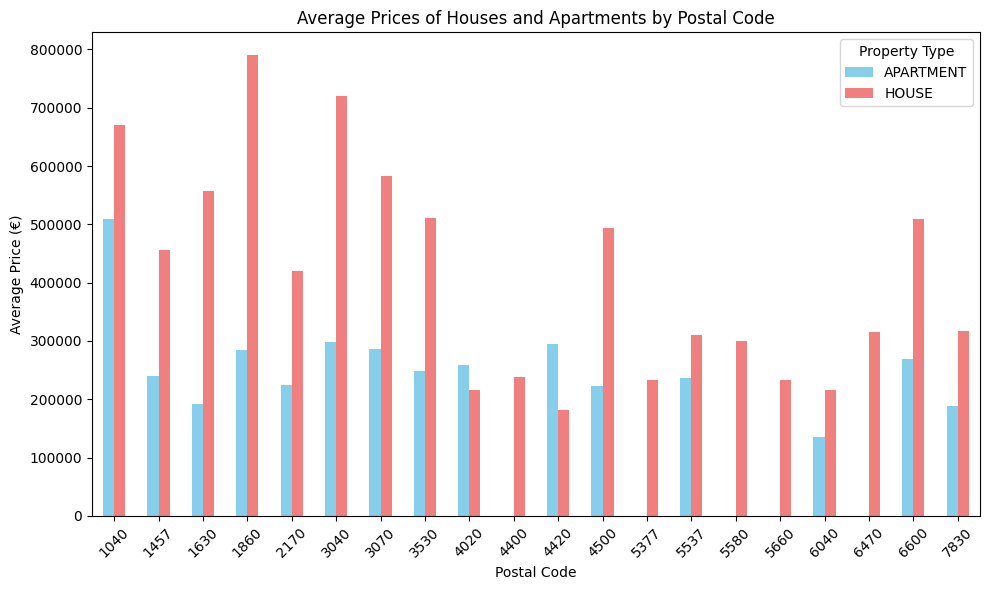

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'D:\\BeCode\\Projects\\immoeliza-pipeline\\scraper\\data\\raw_properties.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Data Cleaning
data['price'] = pd.to_numeric(data['price'], errors='coerce')  # Convert price to numeric
data = data.dropna(subset=['price', 'postal_code', 'type_of_property'])  # Drop rows with missing values

# Filter for houses and apartments
filtered_data = data[data['type_of_property'].isin(['HOUSE', 'APARTMENT'])]

# Calculate average price per postal code and property type
average_prices = (
    filtered_data.groupby(['postal_code', 'type_of_property'])['price']
    .mean()
    .reset_index()
)

# Limit to top 20 postal codes with most listings
top_postal_codes = filtered_data['postal_code'].value_counts().head(20).index
average_prices = average_prices[average_prices['postal_code'].isin(top_postal_codes)]

# Pivot the data for easier plotting
pivot_data = average_prices.pivot(index='postal_code', columns='type_of_property', values='price')

# Plot the bar chart
pivot_data.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Average Prices of Houses and Apartments by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()
